In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
%matplotlib inline 

In [2]:
connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb',
                            cursorclass=pymysql.cursors.DictCursor)

cursor = connection.cursor()


cursor.execute('''SELECT * FROM wallstreetbets''')
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)

In [6]:
df['time'] = pd.to_datetime(df['time'])

In [7]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [9]:
df['full_date']= pd.to_datetime(df[['year','month','day']])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877695 entries, 0 to 877694
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   author     877695 non-null  object        
 1   score      877695 non-null  int64         
 2   selftext   877695 non-null  object        
 3   time       877695 non-null  datetime64[ns]
 4   title      877695 non-null  object        
 5   url        877695 non-null  object        
 6   day        877695 non-null  int64         
 7   month      877695 non-null  int64         
 8   year       877695 non-null  int64         
 9   full_date  877695 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 67.0+ MB


In [11]:
# Sort values in time ascending order
df = df.sort_values('time', ascending=True)

In [13]:
import spacy
from spacy import displacy

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
def getmention(text):
    doc=nlp(text)
    org_list = []
    for entity in doc.ents:
        if entity.label_ == 'ORG':
            org_list.append(entity.text)
    org_list = list(set(org_list))
    return org_list

In [16]:
df['org'] = df['title'].apply(getmention)

In [17]:
# Make Stock class to easily count # of mentions per time frame
class Stock:
    def __init__(self, name):
        self.name = name
    
    # Check stock from ORG column
    def check(self, list):
        if self.name in list:
            return 1
        else:
            return 0

In [20]:
# Assigning interested stocks into objects
GME = Stock('GME')
AMC = Stock('AMC')
NOK = Stock('NOK')
NAKD = Stock('NAKD')
PLTR = Stock('PLTR')
BB = Stock('BB')
SLV = Stock('SLV')
RH = Stock('RH')
APHA = Stock('APHA')
AMD = Stock('AMD')
AAC = Stock('AAC')
CCIV = Stock('CCIV')
HODL = Stock('HODL')
BBBY = Stock('BBBY')
ZOM = Stock('ZOM')
APPLE = Stock('APPLE')
SOS = Stock('SOS')
KOSS = Stock('KOSS')
AMAZON = Stock('AMAZON')

In [23]:
# Created new rows to count each stock mentions
stock_list = [GME, AMC, NOK, NAKD, PLTR, BB, SLV, RH, APHA, AMD, AAC, CCIV, HODL, BBBY, ZOM, APPLE, SOS, KOSS, AMAZON]
for stock in stock_list:
    df[stock.name] = df['org'].apply(stock.check)

In [286]:
test = df.groupby(['full_date']).agg({'GME':'sum', 'AMC':'sum', 'NOK':'sum', 'NAKD':'sum', 'PLTR':'sum', 
                                           'BB':'sum', 'SLV':'sum', 'RH':'sum', 'APHA':'sum', 
                                           'AMD':'sum', 'AAC':'sum','CCIV':'sum', 'HODL':'sum', 'BBBY':'sum', 
                                           'ZOM':'sum', 'APPLE':'sum', 'SOS':'sum', 'KOSS':'sum', 'AMAZON':'sum'})
test

,GME,AMC,NOK,NAKD,PLTR,BB,SLV,RH,APHA,AMD,AAC,CCIV,HODL,BBBY,ZOM,APPLE,SOS,KOSS,AMAZON
full_date,,,,,,,,,,,,,,,,,,,
2021-01-01,31,1,0,0,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2021-01-02,29,1,0,0,15,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2021-01-03,30,3,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-04,60,0,0,0,41,0,0,0,0,2,0,0,0,0,3,0,0,0,0
2021-01-05,53,1,0,1,24,0,2,1,0,2,0,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,84,37,0,2,5,0,0,0,0,0,0,0,3,0,2,0,1,0,0
2021-04-23,51,22,2,3,3,0,0,0,1,8,0,1,1,0,1,0,0,0,0
2021-04-24,32,14,0,0,6,0,2,0,0,1,0,0,2,0,0,0,0,0,0


In [287]:
# cumulative sum of mentions daily
stock_column_list = ['GME', 'AMC', 'NOK', 'NAKD', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC',
                     'CCIV', 'HODL', 'BBBY', 'ZOM', 'APPLE', 'SOS', 'KOSS', 'AMAZON']
for column in stock_column_list:
    column_cumsum = column + "_sum"
    test[column_cumsum] = test[column].cumsum()

In [168]:
# Insert test df into streamlit
hostname="localhost"
dbname="mydb"
uname="root"
pwd="pos99247"
engine = create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host=hostname, db=dbname, user=uname, pw=pwd))

test4.to_sql('test4', engine, index=False)

In [84]:
def daily_mention_grapher(date):
    row = test[['GME', 'AMC', 'NOK', 'NAKD', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC',
                     'CCIV', 'HODL', 'BBBY', 'ZOM', 'APPLE', 'SOS', 'KOSS', 'AMAZON']].loc[date]
    row = row[row>0]
    row = row.sort_values()
    row.plot(kind = 'barh')
    plt.title('2021-01-01 mentions of stocks on wallstreetbets')

In [160]:
row = test[['GME', 'AMC', 'NOK', 'NAKD', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC',
                     'CCIV', 'HODL', 'BBBY', 'ZOM', 'APPLE', 'SOS', 'KOSS', 'AMAZON']].loc['2021-01-01']
row = row[row>0]

In [161]:
row

GME     31
AMC      1
PLTR    24
BBBY     1
Name: 2021-01-01 00:00:00, dtype: int64

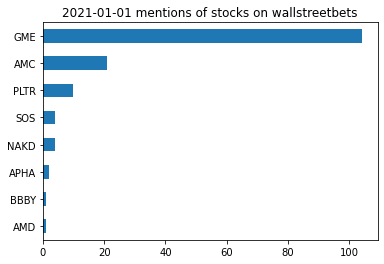

In [85]:
daily_mention_grapher('2021-04-09')

In [37]:
final = df.copy()

In [38]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877695 entries, 354971 to 266126
Data columns (total 49 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   author      877695 non-null  object        
 1   score       877695 non-null  int64         
 2   selftext    877695 non-null  object        
 3   time        877695 non-null  datetime64[ns]
 4   title       877695 non-null  object        
 5   url         877695 non-null  object        
 6   day         877695 non-null  int64         
 7   month       877695 non-null  int64         
 8   year        877695 non-null  int64         
 9   full_date   877695 non-null  datetime64[ns]
 10  org         877695 non-null  object        
 11  GME_sum     877695 non-null  int64         
 12  AMC_sum     877695 non-null  int64         
 13  NOK_sum     877695 non-null  int64         
 14  NAKD_sum    877695 non-null  int64         
 15  PLTR_sum    877695 non-null  int64         
 1

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2021-01-01 to 2021-04-26
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GME         99 non-null     int64 
 1   AMC         99 non-null     int64 
 2   NOK         99 non-null     int64 
 3   NAKD        99 non-null     int64 
 4   PLTR        99 non-null     int64 
 5   BB          99 non-null     int64 
 6   SLV         99 non-null     int64 
 7   RH          99 non-null     int64 
 8   APHA        99 non-null     int64 
 9   AMD         99 non-null     int64 
 10  AAC         99 non-null     int64 
 11  CCIV        99 non-null     int64 
 12  HODL        99 non-null     int64 
 13  BBBY        99 non-null     int64 
 14  ZOM         99 non-null     int64 
 15  APPLE       99 non-null     int64 
 16  SOS         99 non-null     int64 
 17  KOSS        99 non-null     int64 
 18  AMAZON      99 non-null     int64 
 19  GME_sum     99 non-null     int6

In [53]:
test[['full_date']] = test.index

In [56]:
test['date_only'] = test['full_date'].dt.date

In [58]:
test['date_only']

full_date
2021-01-01    2021-01-01
2021-01-02    2021-01-02
2021-01-03    2021-01-03
2021-01-04    2021-01-04
2021-01-05    2021-01-05
                 ...    
2021-04-22    2021-04-22
2021-04-23    2021-04-23
2021-04-24    2021-04-24
2021-04-25    2021-04-25
2021-04-26    2021-04-26
Name: date_only, Length: 99, dtype: object

In [62]:
str(test['date_only'][1])

'2021-01-02'

In [65]:
test['date_only'].max()

datetime.date(2021, 4, 26)

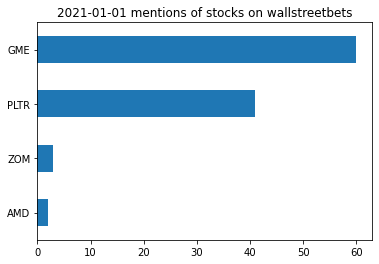

In [72]:
daily_mention_grapher(str(test['date_only'][3]))

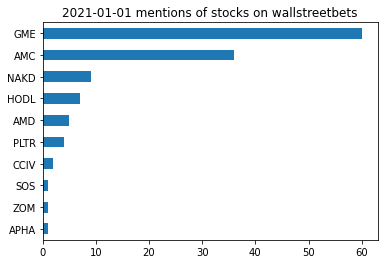

In [75]:
daily_mention_grapher(str(test['date_only'].max()))

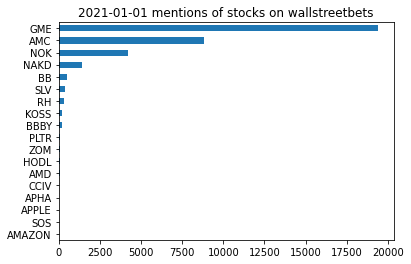

In [155]:
daily_mention_grapher('2021-01-28')

In [78]:
del test['full_date']

In [87]:
test4 = test.copy()

In [92]:
test4 = test4.reset_index()

In [93]:
del test4['full_date']

In [166]:
def daily_mention_grapher1(date):
    index = list(test4[test4['date_only'] == pd.to_datetime(date)].index)[0]
    row = test4[['GME', 'AMC', 'NOK', 'NAKD', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC',
                     'CCIV', 'HODL', 'BBBY', 'ZOM', 'APPLE', 'SOS', 'KOSS', 'AMAZON']].loc[index]
    row = row[row>0]
    row = row.sort_values()
    row.plot(kind = 'barh')
    plt.title('2021-01-01 mentions of stocks on wallstreetbets')

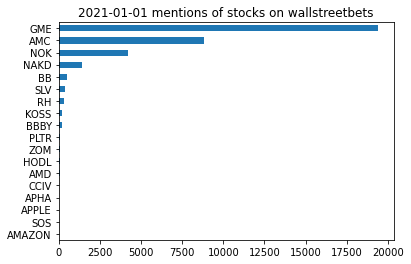

In [167]:
daily_mention_grapher1('2021-01-28')

**automation**

In [219]:
#start time should be the last fulldate in the DF prior to update
#end time shoudl be the present date at the time of the update
def datechanger(year, month, day):
    time = int(datetime.datetime(year, month, day).timestamp())
    return time

def get_reddit_data(starttime, endtime):
    api = PushshiftAPI()
    connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb')
    cursor = connection.cursor()

    submissions = api.search_submissions(after=starttime,
                                         before=endtime,
                                         subreddit='wallstreetbets',
                                         filter=['url', 'author', 'title', 'subreddit', 'score', 'selftext', 'created_utc'])


    for submission in submissions:
        submitted_time = datetime.datetime.fromtimestamp(submission.created_utc).isoformat()
        try:
            cursor.execute("""
            INSERT INTO wallstreetbets (time, author, title, score, selftext, url)
            VALUES (%s, %s, %s, %s, %s, %s)
            """, (submitted_time, submission.author, submission.title, submission.score, submission.selftext, submission.url))
        
            connection.commit()
        except Exception as e:
            print(e)
            connection.rollback()

In [185]:
time[0]['time']

'2021-04-26T13:25:58'

In [188]:
time[0]['time'][:4]

'2021'

In [189]:
time[0]['time'][5:7]

'04'

In [190]:
time[0]['time'][8:10]

'26'

In [216]:
from datetime import date
from datetime import datetime
import datetime
from psaw import PushshiftAPI

In [222]:
def starttime():
    cursor.execute('''SELECT time FROM wallstreetbets ORDER BY time DESC LIMIT 1''')
    time = cursor.fetchall()
    year = int(time[0]['time'][:4])
    month = int(time[0]['time'][5:7])
    day = int(time[0]['time'][8:10])
    return datechanger(year, month, day)

def endtime():
    today = date.today()
    d1 = today.strftime("%Y/%m/%d")
    year = int(d1[:4])
    month = int(d1[5:7])
    day = int(d1[8:10])
    return datechanger(year, month, day)

In [226]:
cursor.execute('''SELECT time FROM wallstreetbets ORDER BY time DESC LIMIT 1''')
time = cursor.fetchall()
time[0]['time'][:10]

'2021-04-26'

In [212]:
today = date.today()
d1 = today.strftime("%Y/%m/%d")
print(d1[:4], d1[5:7], d1[8:10])

2021 04 29


In [214]:
starttime(), endtime()

(1619420400, 1619679600)

In [223]:
starttime()

(2021, 4, 26)

In [224]:
list(starttime())

[2021, 4, 26]

In [220]:
get_reddit_data(1619420400, 1619679600)

'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
'submission' object has no attribute 'selftext'
(1062, "Duplicate entry 'https://youtu.be/ZaI2IlHwmgQ' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/x432fuakukv61.jpg' for key 'wallstreetbets.PRIMARY'

(1062, "Duplicate entry 'https://i.redd.it/tnphaa8blkv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz5wpa/i_starte' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz5w79/enph/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz5vji/just_wir' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/3ry0jvqtkkv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://v.redd.it/opz7c0arkkv61' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/4u2smstmkkv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz5txm/robinhoo' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://apple.news/AblerhZurSoKSPDlzZcYqIw' for key 'wallstreetbets.PRIMARY'")
(1062, "Dup

(1062, "Duplicate entry 'https://i.redd.it/rrj5ha5lfkv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/iqlvubeifkv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz55h8/to_every' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/gallery/mz551i' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz54o7/annual_g' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/wl3corh9fkv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/gallery/mz53yw' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz53t8/investin' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz53qu/need_hel' for key 'wallstreetbets.PRIMARY'")
(1062, 

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz4876/tomorrow' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/iwlkx7878kv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz47el/i_bought' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz47bm/we_all_n' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/i60f37c08kv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz46f5/efir/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz469w/mvis/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://twitter.com/teamdrivinglife/status/1386742184200769539?s' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallst

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz3411/shroomst' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/p9o93wzjzjv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz33d7/mindmed_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz32wx/hive_blo' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz32ro/mrna_sho' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz32pj/nft_for_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/k3e49ce4zjv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://chartexchange.com/article/?id=293024' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comme

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz2908/biden_sp' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz28xx/why_amc_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/r3aw5rjwsjv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://v.redd.it/tggz9iaosjv61' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz27pd/xl_fleet' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/doww15r4t4v61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://v.redd.it/b7i66afesjv61' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/gallery/mz25r5' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/lfklz3cxrjv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.co

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz1aj9/how_awes' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz1a0h/its_fina' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/97y0obnaljv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/f4j4buz0ljv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz1748/amc_thea' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://youtu.be/RbJKBWl7aqg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz16dj/mvis_all' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz16b7/mmed_upl' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz161z/help_

(1062, "Duplicate entry 'https://i.redd.it/hojpuk0qdjv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz0azi/peacock_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/fgll2e1fdjv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://v.redd.it/lmucmywucjv61' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz07q2/safemoon' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz07ey/to_the_m' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz07cz/can_we_g' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/42ukhmkwcjv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mz06na/lazr_eye' for key 'wallstreetbe

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myzc9o/clov/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/gallery/myzbxj' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/98fkb7n36jv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myzbd2/any_news' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myzb5g/there_ar' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/rzevwslu5jv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myzar6/ankr/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/amcstock/comments/myv05y/breaking_news_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myzad7/mi

(1062, "Duplicate entry 'https://i.redd.it/ilu32bi8ziv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myyhz6/royal_he' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/dtsbhvz6ziv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myyhhg/gme_to_t' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myyhaa/aerospac' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/xl9yyu91ziv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/gallery/myygxu' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myygvl/gsx_tech' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myygob/bought_i' for key 'wallst

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myxrmq/having_f' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.imgur.com/lkD61jI.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myxqwd/mict_ann' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/gpnjl6pmsiv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myxpy1/skeptico' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myxp1q/skeptico' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myxp10/palantir' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/mwl2e7c4siv61.png' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myxobu/is

(1062, "Duplicate entry 'https://v.redd.it/s16jn70aiiv61' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mywoxt/shorts_h' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mywocv/is_mvis_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/omi3p5y7iiv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.celebritynetworth.com/articles/entertainment-article' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/ubbuio0liiv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mywn24/wdc/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mywn00/sj_is_bl' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mywln9/elonga

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myu94s/hi_i_hav' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/ndrcnwb7rhv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/cigzpbm6rhv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myu7jk/is_mvis_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myu7ik/all_in_s' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myu6q2/daily_di' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/1pscuvjwqhv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/gallery/myu62k' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myu5vg/waf_the_' for key 'wallst

(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mysdew/sofi_dd_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mysd6e/hello_pe' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://v.redd.it/7moxxyjv2hv61' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/myschu/gme_what' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mysbg0/today_is' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mys9f1/million_' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://www.reddit.com/r/wallstreetbets/comments/mys8gu/mvis/' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://i.redd.it/p6c6v5mw0hv61.jpg' for key 'wallstreetbets.PRIMARY'")
(1062, "Duplicate entry 'https://youtu.be/JaKo3g19E9Y' fo

In [236]:
cursor.execute('''SELECT time FROM wallstreetbets ORDER BY time DESC LIMIT 1''')
time = cursor.fetchall()
time[0]['time'][:10]

'2021-04-28'

In [240]:
connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb',
                            cursorclass=pymysql.cursors.DictCursor)

cursor = connection.cursor()


cursor.execute("""SELECT author, time FROM wallstreetbets WHERE time > date_sub(now(), interval 1 week)""")
rows = cursor.fetchall()
update = pd.DataFrame(rows)

In [241]:
update['time']

0    2021-04-22T18:51:38
Name: time, dtype: object

In [277]:
def updated_rows():
    connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb',
                            cursorclass=pymysql.cursors.DictCursor)

    cursor = connection.cursor()


    cursor.execute("""SELECT author, time FROM wallstreetbets WHERE time > date_sub(now(), interval 1 week)""")
    rows = cursor.fetchall()
    update = pd.DataFrame(rows)
    return update

In [276]:
connection = pymysql.connect(host = 'localhost',
                            user= 'root',
                            password = 'pos99247',
                            db = 'mydb',
                            cursorclass=pymysql.cursors.DictCursor)

cursor = connection.cursor()


cursor.execute("""SELECT * FROM wallstreetbets WHERE time > '2021-04-26'""")
rows = cursor.fetchall()
update = pd.DataFrame(rows)

In [271]:
update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   author    6583 non-null   object
 1   score     6583 non-null   int64 
 2   selftext  6583 non-null   object
 3   time      6583 non-null   object
 4   title     6583 non-null   object
 5   url       6583 non-null   object
dtypes: int64(1), object(5)
memory usage: 308.7+ KB


In [247]:
test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GME         99 non-null     int64 
 1   AMC         99 non-null     int64 
 2   NOK         99 non-null     int64 
 3   NAKD        99 non-null     int64 
 4   PLTR        99 non-null     int64 
 5   BB          99 non-null     int64 
 6   SLV         99 non-null     int64 
 7   RH          99 non-null     int64 
 8   APHA        99 non-null     int64 
 9   AMD         99 non-null     int64 
 10  AAC         99 non-null     int64 
 11  CCIV        99 non-null     int64 
 12  HODL        99 non-null     int64 
 13  BBBY        99 non-null     int64 
 14  ZOM         99 non-null     int64 
 15  APPLE       99 non-null     int64 
 16  SOS         99 non-null     int64 
 17  KOSS        99 non-null     int64 
 18  AMAZON      99 non-null     int64 
 19  GME_sum     99 non-null     int64 
 20  AMC_sum     

In [248]:
test4.head(5)

,GME,AMC,NOK,NAKD,PLTR,BB,SLV,RH,APHA,AMD,...,AAC_sum,CCIV_sum,HODL_sum,BBBY_sum,ZOM_sum,APPLE_sum,SOS_sum,KOSS_sum,AMAZON_sum,date_only
0,31,1,0,0,24,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2021-01-01
1,29,1,0,0,15,0,0,0,0,2,...,0,0,0,2,0,0,0,0,0,2021-01-02
2,30,3,0,0,34,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2021-01-03
3,60,0,0,0,41,0,0,0,0,2,...,0,0,0,2,3,0,0,0,0,2021-01-04
4,53,1,0,1,24,0,2,1,0,2,...,0,0,0,4,4,0,0,0,0,2021-01-05


In [ ]:
# df['time'] = pd.to_datetime(df['time'])
# df['day'] = df['time'].dt.day
# df['month'] = df['time'].dt.month
# df['year'] = df['time'].dt.year
# df['full_date']= pd.to_datetime(df[['year','month','day']])
# test['date_only'] = test['full_date'].dt.date
# del df[['day','month','year']]

In [ ]:
'''
# Sort values in time ascending order
df = df.sort_values('time', ascending=True)






'''

In [ ]:
'''
test = df.groupby(['full_date']).agg({'GME':'sum', 'AMC':'sum', 'NOK':'sum', 'NAKD':'sum', 'PLTR':'sum', 
                                           'BB':'sum', 'SLV':'sum', 'RH':'sum', 'APHA':'sum', 
                                           'AMD':'sum', 'AAC':'sum','CCIV':'sum', 'HODL':'sum', 'BBBY':'sum', 
                                           'ZOM':'sum', 'APPLE':'sum', 'SOS':'sum', 'KOSS':'sum', 'AMAZON':'sum'})
test
'''

In [ ]:
def getmention(text):
    doc=nlp(text)
    org_list = []
    for entity in doc.ents:
        if entity.label_ == 'ORG':
            org_list.append(entity.text)
    org_list = list(set(org_list))
    return org_list

In [ ]:
class Stock:
    def __init__(self, name):
        self.name = name
    
    # Check stock from ORG column
    def check(self, list):
        if self.name in list:
            return 1
        else:
            return 0

In [ ]:
GME = Stock('GME')
AMC = Stock('AMC')
NOK = Stock('NOK')
NAKD = Stock('NAKED')
PLTR = Stock('PLTR')
BB = Stock('BB')
SLV = Stock('SLV')
RH = Stock('RH')
APHA = Stock('APHA')
AMD = Stock('AMD')
AAC = Stock('AAC')
CCIV = Stock('CCIV')
HODL = Stock('HODL')
BBBY = Stock('BBBY')
ZOM = Stock('ZOM')
APPLE = Stock('APPLE')
SOS = Stock('SOS')
KOSS = Stock('KOSS')
AMAZON = Stock('Amazon')
stock_list = [GME, AMC, NOK, NAKD, PLTR, BB, SLV, RH, APHA, AMD, AAC, CCIV, HODL, BBBY, ZOM, APPLE, SOS, KOSS, AMAZON]

In [278]:
def dataprocessing(df):
    stock_list = [GME, AMC, NOK, NAKD, PLTR, BB, SLV, RH, APHA, AMD, AAC, CCIV, HODL, BBBY, ZOM, APPLE, SOS, KOSS, AMAZON]
    stock_column_list = ['GME', 'AMC', 'NOK', 'NAKD', 'PLTR', 'BB', 'SLV', 'RH', 'APHA', 'AMD', 'AAC',
                     'CCIV', 'HODL', 'BBBY', 'ZOM', 'APPLE', 'SOS', 'KOSS', 'AMAZON']
    df['time'] = pd.to_datetime(df['time'])
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month
    df['year'] = df['time'].dt.year
    df['full_date']= pd.to_datetime(df[['year','month','day']])
    df = df.sort_values('time', ascending=True)
    df['org'] = df['title'].apply(getmention)
    for stock in stock_list:
        df[stock.name] = df['org'].apply(stock.check)
    test = df.groupby(['full_date']).agg({'GME':'sum', 'AMC':'sum', 'NOK':'sum', 'NAKD':'sum', 'PLTR':'sum', 
                                           'BB':'sum', 'SLV':'sum', 'RH':'sum', 'APHA':'sum', 
                                           'AMD':'sum', 'AAC':'sum','CCIV':'sum', 'HODL':'sum', 'BBBY':'sum', 
                                           'ZOM':'sum', 'APPLE':'sum', 'SOS':'sum', 'KOSS':'sum', 'AMAZON':'sum'})
    for column in stock_column_list:
        column_cumsum = column + "_sum"
        test[column_cumsum] = test[column].cumsum()
    test[['full_date']] = test.index
    test['date_only'] = test['full_date'].dt.date
    del test['full_date']
    return test

In [279]:
final = dataprocessing(update)

In [280]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2021-04-26 to 2021-04-28
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GME         3 non-null      int64 
 1   AMC         3 non-null      int64 
 2   NOK         3 non-null      int64 
 3   NAKD        3 non-null      int64 
 4   PLTR        3 non-null      int64 
 5   BB          3 non-null      int64 
 6   SLV         3 non-null      int64 
 7   RH          3 non-null      int64 
 8   APHA        3 non-null      int64 
 9   AMD         3 non-null      int64 
 10  AAC         3 non-null      int64 
 11  CCIV        3 non-null      int64 
 12  HODL        3 non-null      int64 
 13  BBBY        3 non-null      int64 
 14  ZOM         3 non-null      int64 
 15  APPLE       3 non-null      int64 
 16  SOS         3 non-null      int64 
 17  KOSS        3 non-null      int64 
 18  AMAZON      3 non-null      int64 
 19  GME_sum     3 non-null      int64

In [282]:
# Try to insert final DF into the stream lit

hostname="localhost"
dbname="mydb"
uname="root"
pwd="pos99247"
engine = create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host=hostname, db=dbname, user=uname, pw=pwd))

final.to_sql('test4', engine, if_exists = 'append', index=False)

In [ ]:
def update_graph(df):
    hostname="localhost"
    dbname="mydb"
    uname="root"
    pwd="pos99247"
    engine = create_engine('mysql+pymysql://{user}:{pw}@{host}/{db}'.format(host=hostname, db=dbname, user=uname, pw=pwd))
    df.to_sql('test4', engine, if_exists = 'append')

In [ ]:
df.groupby(['date_only']).agg

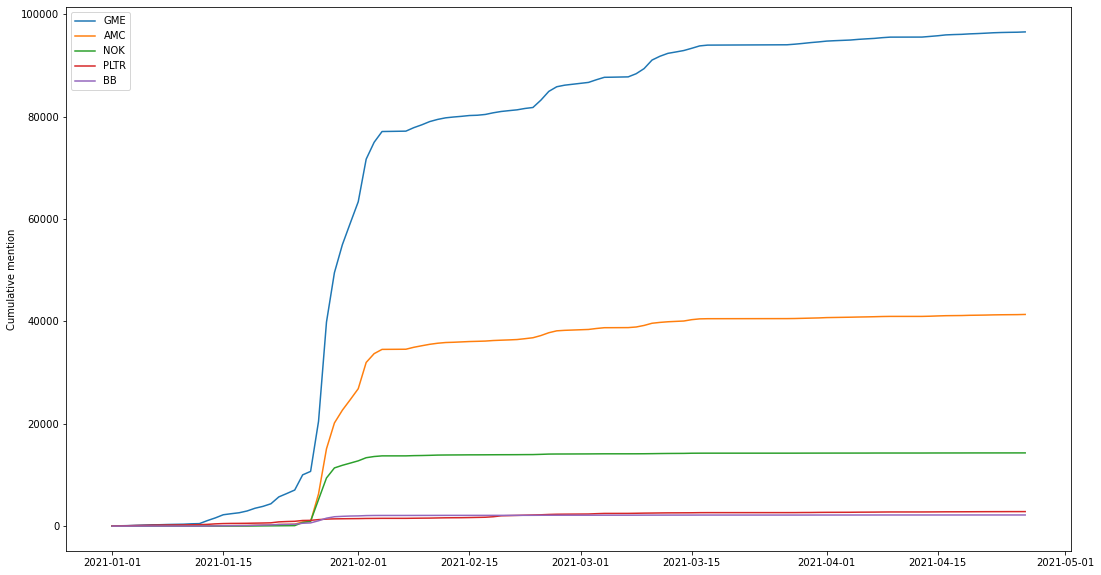

In [293]:
plt.figure(figsize=(18, 10))
sns.lineplot(x='full_date', y='GME_sum', data = test)
sns.lineplot(x='full_date', y='AMC_sum', data = test)
sns.lineplot(x='full_date', y='NOK_sum', data = test)
sns.lineplot(x='full_date', y='PLTR_sum', data = test)
sns.lineplot(x='full_date', y='BB_sum', data = test)
plt.xlabel('')
plt.ylabel('Cumulative mention')
plt.xticks()
plt.legend(['GME', 'AMC', 'NOK', 'PLTR', 'BB']);

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877695 entries, 354971 to 266126
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   author      877695 non-null  object        
 1   score       877695 non-null  int64         
 2   selftext    877695 non-null  object        
 3   time        877695 non-null  datetime64[ns]
 4   title       877695 non-null  object        
 5   url         877695 non-null  object        
 6   day         877695 non-null  int64         
 7   month       877695 non-null  int64         
 8   year        877695 non-null  int64         
 9   full_date   877695 non-null  datetime64[ns]
 10  org         877695 non-null  object        
 11  GME_sum     877695 non-null  int64         
 12  AMC_sum     877695 non-null  int64         
 13  NOK_sum     877695 non-null  int64         
 14  NAKD_sum    877695 non-null  int64         
 15  PLTR_sum    877695 non-null  int64         
 1

In [295]:
df[['title', 'selftext', 'author', 'score', 'time', 'url']].sample(5)

,title,selftext,author,score,time,url
514307,What’s your opinion on NOK,[removed],Pablo_Escabor_,1,2021-01-28 13:09:05,https://www.reddit.com/r/wallstreetbets/commen...
492621,AMC IS THE NEW ONE BOYS FUCK ROBINHOOD,Everyone jump in AMC let’s pump this baby up t...,Adept_Commission_993,1,2021-01-28 09:23:11,https://www.reddit.com/r/wallstreetbets/commen...
345051,Hold!!!!!!! 😭,,DemoAlianza,1,2021-02-03 18:22:58,https://www.reddit.com/gallery/lc53o3
522070,"With all that’s happening with Robinhood, don’...",[removed],AyoSummy,1,2021-01-28 14:56:50,https://www.reddit.com/r/wallstreetbets/commen...
106614,Me when someone makes a detailed post on why I...,,Total-Nothing,1,2021-01-30 10:28:56,https://i.redd.it/c2mwdsy6jie61.png
